In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras import layers ,models
import numpy as np
import numpy as np 
train_data = np.load('trainX.npy')
train_label = np.load('trainy.npy')
test_data = np.load('testX.npy')
test_label = np.load('testy.npy')
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

idx = np.random.permutation(len(train_data))
train_data = train_data[idx]
train_label = train_label[idx]

num_classes = len(np.unique(train_label))
num_classes


(1022, 1024, 6)
(1022, 1024)
(332, 1024, 6)
(332, 1024)


2

In [12]:
model = keras.Sequential(
    [
        layers.Input(shape=(train_data.shape[1], train_data.shape[2])),
        layers.Conv1D(
            filters=64, kernel_size=16, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1D(
            filters=64, kernel_size=16, padding="same", strides=1, activation="relu"
        ),
        layers.Dropout(rate=0.1),
        layers.Conv1D(
            filters=32, kernel_size=16, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=32, kernel_size=16, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.1),
        layers.Conv1DTranspose(
            filters=64, kernel_size=16, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=16, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse",metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 512, 64)           6208      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 512, 64)           65600     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512, 64)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 256, 32)           32800     
_________________________________________________________________
conv1d_transpose_9 (Conv1DTr (None, 512, 32)           16416     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512, 32)           0         
_________________________________________________________________
conv1d_transpose_10 (Conv1DT (None, 1024, 64)         

In [13]:
history = model.fit(
    train_data,
    train_label,
    epochs=50,
    batch_size=100,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
9/9 [==============================] - 5s 480ms/step - loss: 0.4041 - accuracy: 0.5045 - val_loss: 0.3608 - val_accuracy: 0.5034
Epoch 2/50
9/9 [==============================] - 4s 460ms/step - loss: 0.2807 - accuracy: 0.5740 - val_loss: 0.2298 - val_accuracy: 0.5794
Epoch 3/50
9/9 [==============================] - 4s 468ms/step - loss: 0.2383 - accuracy: 0.5731 - val_loss: 0.2380 - val_accuracy: 0.5942
Epoch 4/50
9/9 [==============================] - 4s 474ms/step - loss: 0.2228 - accuracy: 0.6416 - val_loss: 0.2100 - val_accuracy: 0.6954
Epoch 5/50
9/9 [==============================] - 4s 478ms/step - loss: 0.2069 - accuracy: 0.6615 - val_loss: 0.2010 - val_accuracy: 0.6942
Epoch 6/50
9/9 [==============================] - 4s 488ms/step - loss: 0.1889 - accuracy: 0.7306 - val_loss: 0.1673 - val_accuracy: 0.7998
Epoch 7/50
9/9 [==============================] - 4s 480ms/step - loss: 0.1618 - accuracy: 0.8053 - val_loss: 0.1500 - val_accuracy: 0.7984
Epoch 8/50
9/9 [====

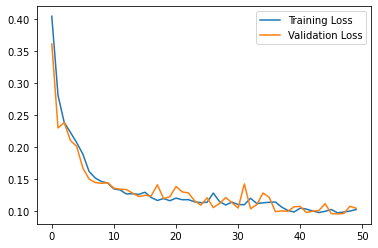

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

11/11 [==============================] - 0s 39ms/step - loss: 0.1662 - accuracy: 0.7804
Test accuracy 0.7803646326065063
Test loss 0.16622605919837952
